In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt



In [21]:
df=sns.load_dataset('titanic')
for col in df.columns:
    print(f"{col}: {df[col].isnull().sum()}")
df.shape
df.head(10)

survived: 0
pclass: 0
sex: 0
age: 177
sibsp: 0
parch: 0
fare: 0
embarked: 2
class: 0
who: 0
adult_male: 0
deck: 688
embark_town: 2
alive: 0
alone: 0


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [22]:
value=df['age'].median()
df['age'].fillna(value,inplace=True)


In [23]:
df.drop(['deck','who','survived','adult_male','embarked','class'],axis=1,inplace=True)
df.head(10)


,pclass,sex,age,sibsp,parch,fare,embark_town,alive,alone
0,3,male,22.0,1,0,7.2500,Southampton,no,False
1,1,female,38.0,1,0,71.2833,Cherbourg,yes,False
2,3,female,26.0,0,0,7.9250,Southampton,yes,True
3,1,female,35.0,1,0,53.1000,Southampton,yes,False
4,3,male,35.0,0,0,8.0500,Southampton,no,True
5,3,male,28.0,0,0,8.4583,Queenstown,no,True
6,1,male,54.0,0,0,51.8625,Southampton,no,True
7,3,male,2.0,3,1,21.0750,Southampton,no,False
8,3,female,27.0,0,2,11.1333,Southampton,yes,False
9,2,female,14.0,1,0,30.0708,Cherbourg,yes,False


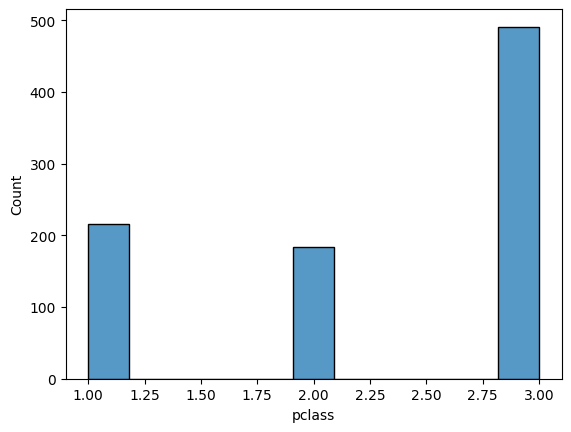

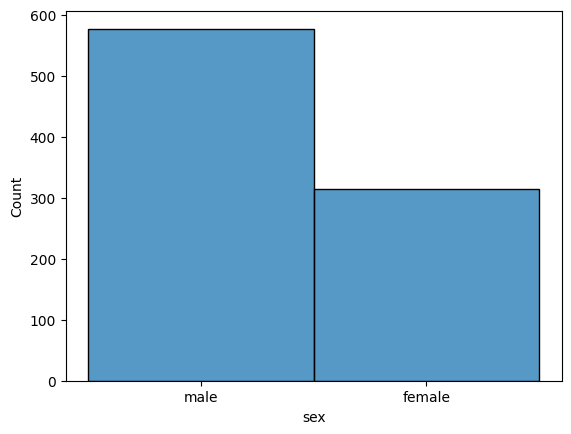

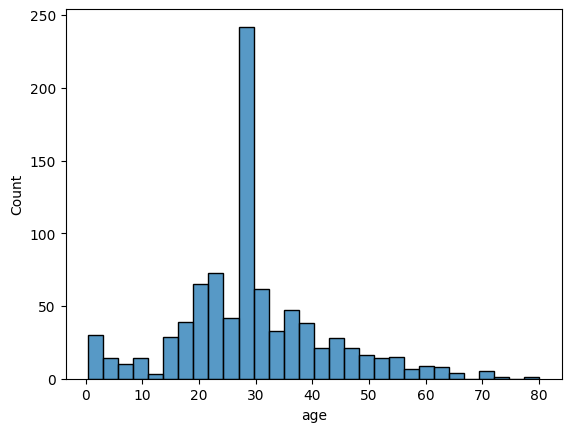

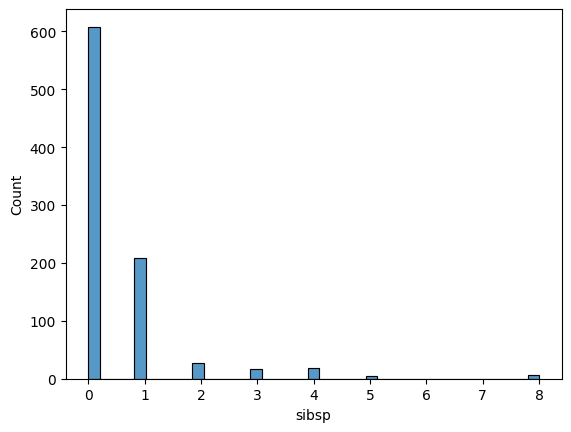

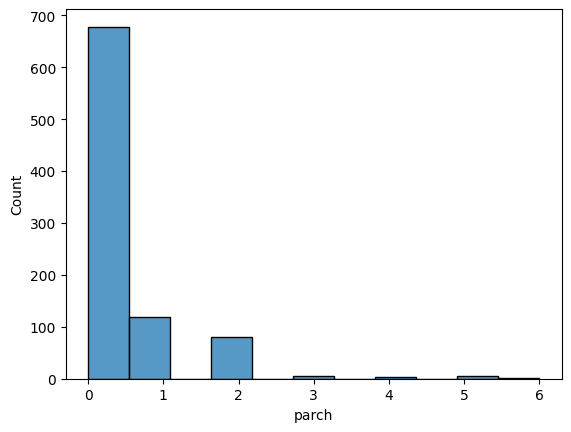

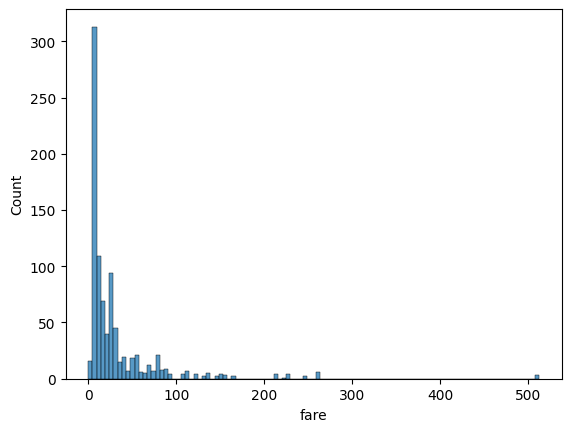

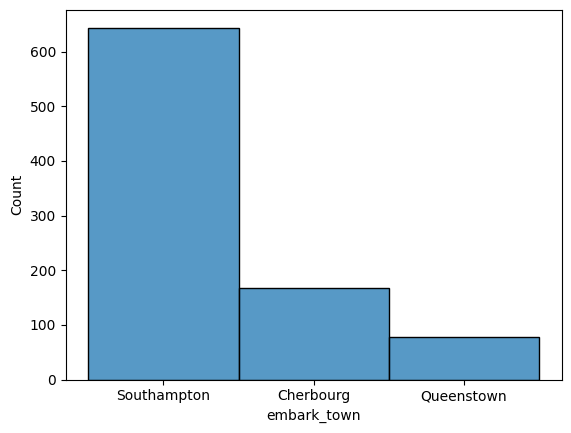

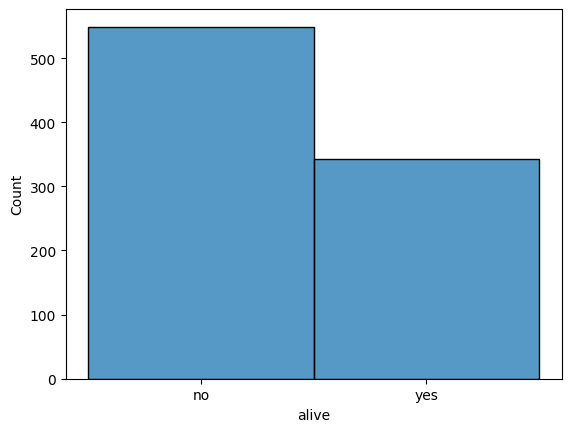

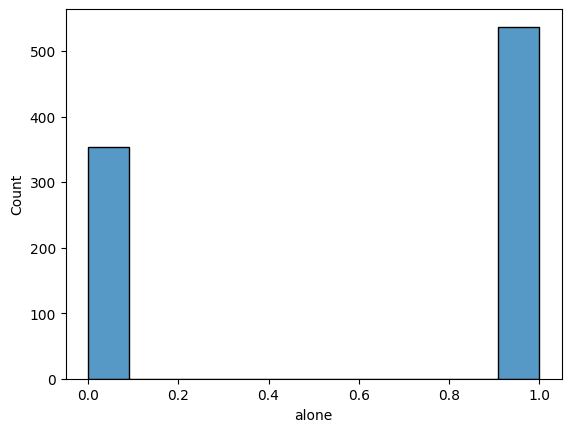

In [24]:
for col in df.columns:
    sns.histplot(df[col])
    plt.show()

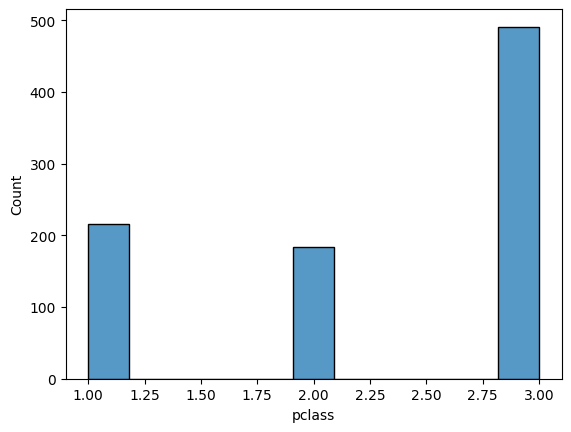

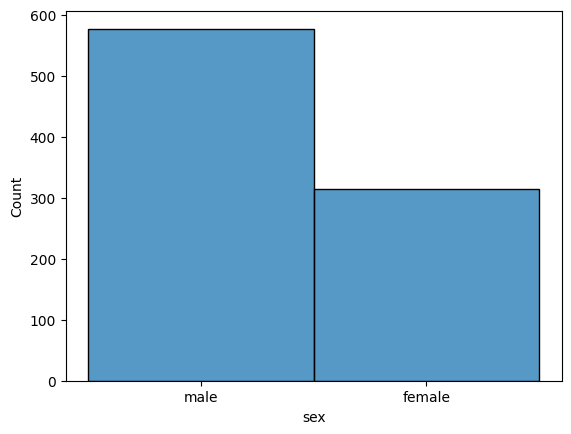

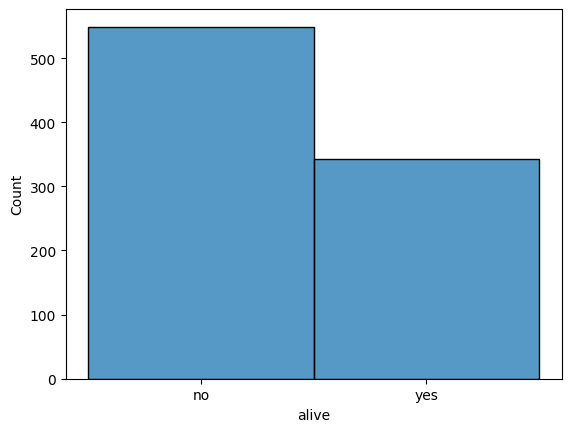

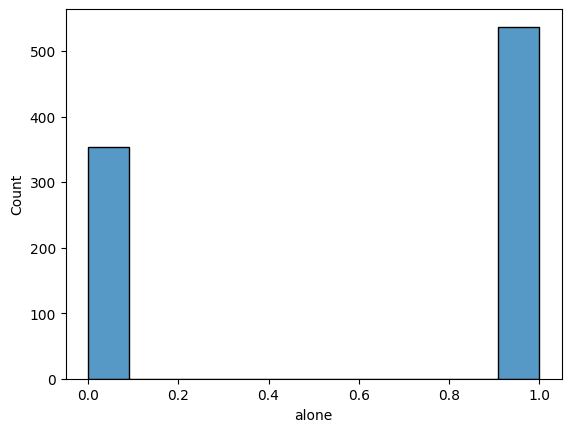

In [27]:
outlier_cols=['embark_town','fare','sibsp','age','parch']
for col in df.columns:
    if col not in outlier_cols:
        sns.histplot(df[col])
        plt.show()

In [36]:
df.head(10)
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df1=df.copy()
df1['alive']=le.fit_transform(df1['alive'])
df1.head(10),outlier_cols

(   pclass     sex   age  sibsp  parch     fare  embark_town  alive  alone
 0       3    male  22.0      1      0   7.2500  Southampton      0  False
 1       1  female  38.0      1      0  71.2833    Cherbourg      1  False
 2       3  female  26.0      0      0   7.9250  Southampton      1   True
 3       1  female  35.0      1      0  53.1000  Southampton      1  False
 4       3    male  35.0      0      0   8.0500  Southampton      0   True
 5       3    male  28.0      0      0   8.4583   Queenstown      0   True
 6       1    male  54.0      0      0  51.8625  Southampton      0   True
 7       3    male   2.0      3      1  21.0750  Southampton      0  False
 8       3  female  27.0      0      2  11.1333  Southampton      1  False
 9       2  female  14.0      1      0  30.0708    Cherbourg      1  False,
 ['embark_town', 'fare', 'sibsp', 'age', 'parch'])

In [39]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
categorical_cols = ['embark_town', 'pclass', 'sibsp', 'parch', 'alone']
numerical_cols = ['fare', 'age']
model_preprocessor=ColumnTransformer(
    transformers=[
        ('ohe',OneHotEncoder(drop='first'),categorical_cols),
        ('num',RobustScaler(),numerical_cols)
        
    ]    
)

model_pipeline=Pipeline(
    steps=[
        ('preprocessor',model_preprocessor),
        ('model',LogisticRegression())
    ]
)

X=df.drop('alive',axis=1)
y=df['alive']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model_pipeline.fit(X_train,y_train)
model_pipeline.score(X_test,y_test)


0.7206703910614525